1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is this number signficantly different?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 3 or larger with respect a normal distribution.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize, stats

x0 = 15
sigma = 2.5

#create poission distribution with historical average 6.3.

x_rvs = stats.poisson.rvs(6.3, size=200000, random_state=0)
print("Hurricanes happened in each year in the last 200000 year: ", x_rvs)
mu = x_rvs.mean()

# determining the Z score
Z = abs(x0 - mu) / sigma
print("Z =", Z)
pvalue = stats.norm.cdf(-Z) + (1. - stats.norm.cdf(Z))
print("p-value =", pvalue)

Hurricanes happened in each year in the last 200000 year:  [12  3  9 ...  5  8  3]
Z = 3.477708
p-value = 0.0005057205111107357


The likelihood of observing 15 hurricanes in a single year is lower than the historical average.
If we accept a significance level of 0.05, we can reject the null hypothesis and express uncertainty regarding the frequency of storms (15). 

2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and 

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -5.355623844793182


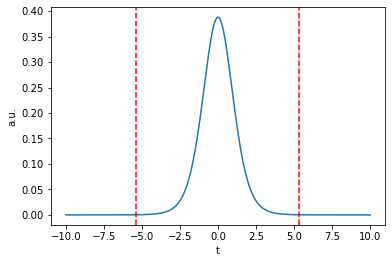

p-value = 0.00045894515934558235


In [13]:
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

sigma1 = np.sqrt(np.var(pre, ddof=1)) # variance and its sqrt()
sigma2 = np.sqrt(np.var(post, ddof=1)) # variance and its sqrt()
sigma = np.sqrt(((sigma1 **2)+(sigma2 **2))/2)
sample_mean1 = np.mean(pre)
sample_mean2 = np.mean(post)
n = len(pre)
T = (sample_mean1 - sample_mean2) / (sigma / np.sqrt(n))
print("T =", T)

xs = np.linspace(-10, +10, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T))
plt.axvline(T, linestyle='--', color='red')
plt.axvline(-T, linestyle='--', color='red')
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# we now calculate the p-value:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)



3\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

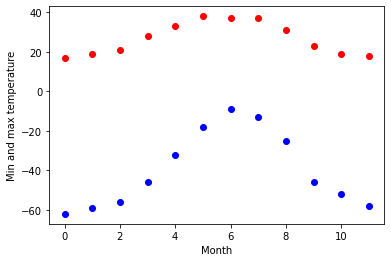

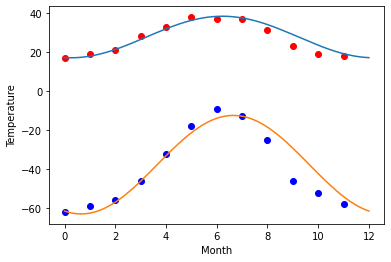

The fit is reasonable


In [7]:
#plotting temperatures
max_temp = np.array([17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18])
min_temp = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
months = np.arange(12)
plt.plot(months, max_temp, 'ro' )
plt.plot(months, min_temp, 'bo')
plt.xlabel('Month')
plt.ylabel('Min and max temperature')

#describing a function to fit the temperatures
def annual_temps(time, average, amplitude, time_offset):
    return (average + amplitude * np.cos((time + time_offset) * 2 * np.pi / time.max()))

res_max, cov_max = optimize.curve_fit(annual_temps, months, max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(annual_temps, months, min_temp, [-40, 20, 0])

#Plot the result. 
days = np.linspace(0, 12, num=365)
plt.figure()
plt.plot(months, max_temp, 'ro')
plt.plot(days, annual_temps(days, *res_max))
plt.plot(months, min_temp, 'bo')
plt.plot(days, annual_temps(days, *res_min))
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.show()

print('The fit is reasonable')



4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

Text(0, 0.5, 'samples')

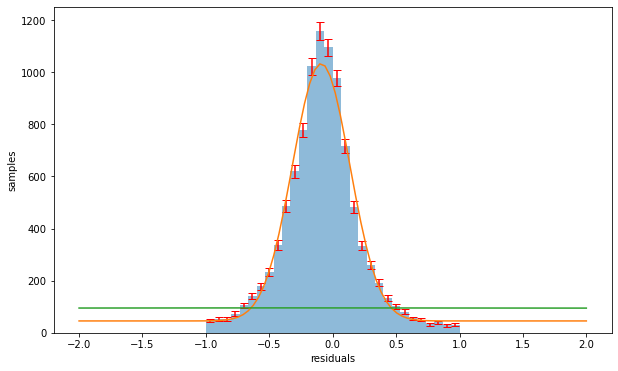

In [46]:
content = pd.read_pickle('data/residuals_261.pkl')
data = np.array(content, ndmin=1)[0]
df = pd.DataFrame(data)
df = df[df['residuals'].abs() < 1.]


def gaussian(x, a, b, x0, sigma): return a*np.exp( -(x - x0)**2 / (2*sigma**2) ) + b

def laplace(x, a, b, c, x0): return a*np.exp( - np.abs(x-x0) / b) + c


residuals = df['residuals'].to_numpy()

fig, ax = plt.subplots(figsize=(10, 6))

# plot the histogram
h, bins, _ = ax.hist(residuals, bins=30, alpha=.5)

# plot the Poisson uncertainties
centers = .5*(bins[:-1] + bins[1:])
poisson_err = np.sqrt(h)
ax.errorbar(x = centers, y=h, yerr = poisson_err, color='r', fmt='.', ms=0, capsize=4)

#fittting the histogram to the residuals
popt1, pcov1 = optimize.curve_fit(gaussian, centers, h, sigma=poisson_err)
popt2, pcov2 = optimize.curve_fit(laplace, centers, h, sigma=poisson_err)

dense = np.linspace(-2, 2, 100)
plt.plot(dense, gaussian(dense, *popt1) )
plt.plot(dense, laplace(dense, *popt2))
plt.xlabel('residuals')
plt.ylabel('samples')



5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [31]:
#!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2023-01-20 16:57:49--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2023-01-20 16:57:50--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb109d42cc1a4eb559fda615193.dl.dropboxusercontent.com/cd/0/inline/B0575peaP8uEMARzY8sIpDC8yDhu73V0dTRsPcbDzOp-LBIyRxqJSPM2oY8GOohNl4aZAct68gI42UOBO5Qss2aLph857CzPazET6POZYhF_Adb1pWkGmr71gL1yCFYmMLKxgdynIucH_bke_8rtEp3CNxRl5KuY2wZldJIhe3gOiA/file# [following]
--2023-01-20 16:57:50--  https://ucb109d42cc1a4eb559fda615193.dl.dropboxuserco

Best fit value of the parameters:
a = -10.07 
b = 18.59 
c = 9.17 
Overall average temperature in Munich: 8.785467700155515 degrees


Text(0, 0.5, 'temperature')

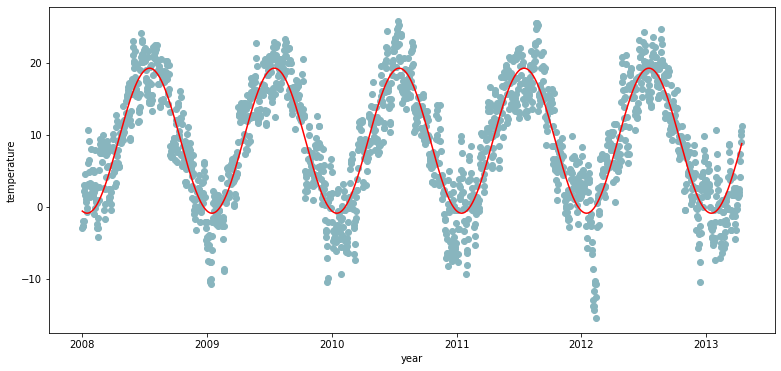

In [32]:
def f(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

#load the data
data = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep=' ',header = None )
data.columns = ['year','temps']
data_fil = data[(data['year']>=2008)&(data['temps']<=60)]
year = data_fil['year']
temp = data_fil['temps']

#perform fit
par, cov = optimize.curve_fit(f, year, temp)
print('Best fit value of the parameters:')
print(f'a = {par[0]:.2f} ')
print(f'b = {par[1]:.2f} ')
print(f'c = {par[2]:.2f} ')
print("Overall average temperature in Munich:",  np.mean(data_fil['temps']), 'degrees')

#plot the data
plt.figure(figsize= (13,6))
plt.scatter(data_fil['year'],data_fil['temps'], color = '#88B5BE')
plt.plot(year, f(year, *par), 'r')
plt.xlabel('year')
plt.ylabel('temperature')

